In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -U ipykernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.


In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 114.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/3 [numpy]^C
^C


In [ ]:
#pip install autogluon autogluon.tabular "mxnet<2.0.0"

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
Using cached mxnet-1.9.1-py3-none-manylinux2014_x

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
df = sns.load_dataset('titanic')
df = df[['sex', 'age', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alive', 'alone']]

df.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


In [ ]:
df.groupby('alive')['sex'].value_counts()


alive  sex   
no     male      468
       female     81
yes    female    233
       male      109
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(
    label="alive",
    problem_type='binary',
    eval_metric='accuracy').fit(
    train_data=df_train,
    time_limit=200,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_053137"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.21 GB / 12.67 GB (88.5%)
Disk Space Avail:   64.68 GB / 107.72 GB (60.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

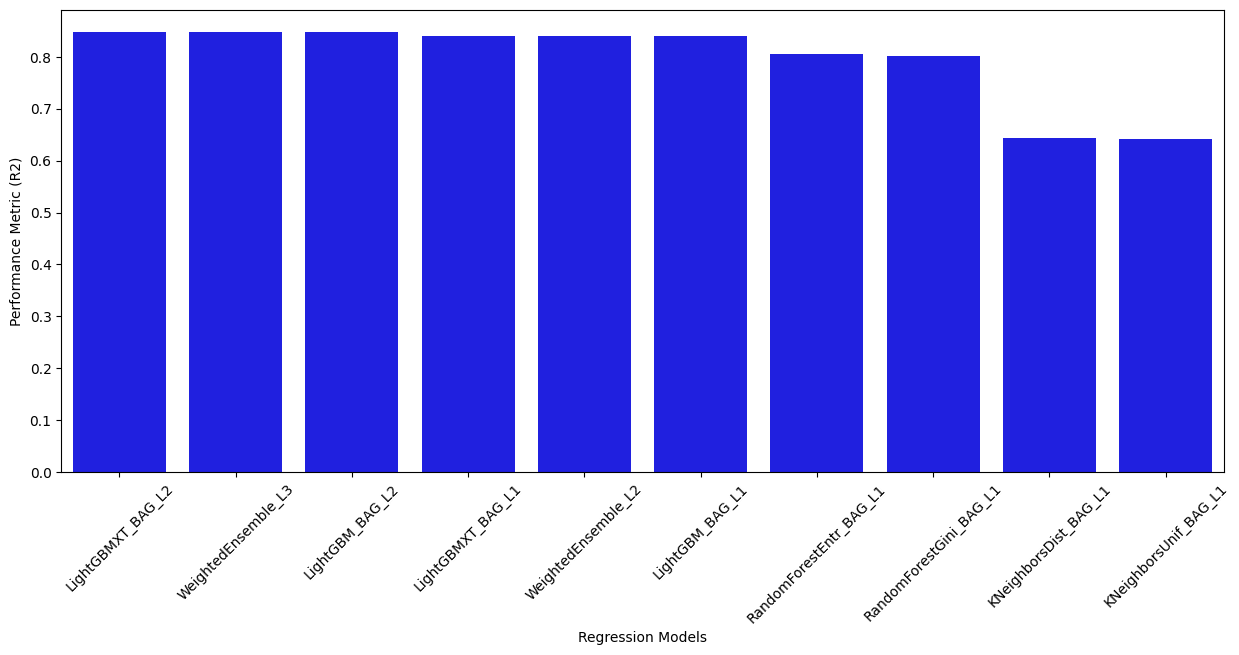

In [ ]:
# Inisialisasi figur matplotlib
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(df_test)

{'accuracy': 0.8324022346368715,
 'balanced_accuracy': 0.7988142292490119,
 'mcc': 0.644409723792334,
 'roc_auc': 0.8918313570487484,
 'f1': 0.75,
 'precision': 0.8823529411764706,
 'recall': 0.6521739130434783}

In [ ]:
top_model = predictor.leaderboard(silent=True).iloc[0]['model']
print("Model terbaik:", top_model)




Model terbaik: LightGBMXT_BAG_L2


In [ ]:
print(predictor.model_names)



<bound method TabularPredictor.model_names of <autogluon.tabular.predictor.predictor.TabularPredictor object at 0x7d41b12e4890>>


In [ ]:
predictor.feature_importance(data=df_train)


Computing feature importance via permutation shuffling for 8 features using 712 rows with 5 shuffle sets...
	37.75s	= Expected runtime (7.55s per shuffle set)
	8.82s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
sex,0.209270,0.010788,8.445063e-07,5,0.231483,0.187057
class,0.095787,0.009285,1.046130e-05,5,0.114904,0.076670
age,0.082584,0.006692,5.127803e-06,5,0.096362,0.068806
fare,0.060112,0.005199,6.645520e-06,5,0.070816,0.049409
embark_town,0.038202,0.008333,2.552295e-04,5,0.055360,0.021045
alone,0.024438,0.004397,1.204818e-04,5,0.033491,0.015385
deck,0.011236,0.001404,2.869639e-05,5,0.014128,0.008344
parch,0.008989,0.002738,9.164944e-04,5,0.014626,0.003351


In [ ]:

X_test = df_test.drop(columns=['alive'])  
y_test = df_test['alive']                  


y_pred = predictor.predict(X_test)

df_result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

df_result.head(20)


,Actual,Predicted
495,no,no
648,no,no
278,no,no
31,yes,yes
255,yes,no
298,yes,no
609,yes,yes
318,yes,yes
484,yes,no
367,yes,yes


In [ ]:
# Simpan model setelah training
predictor.save("/content/AutogluonModels")

In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250608_053137")

In [ ]:
import os
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f'{subindent}{f}')

list_files('/content/AutogluonModels')


AutogluonModels/
    ag-20250608_053137/
        version.txt
        predictor.pkl
        metadata.json
        learner.pkl
        utils/
            data/
                X.pkl
                y.pkl
        models/
            trainer.pkl
            WeightedEnsemble_L2/
                model.pkl
                utils/
                    oof.pkl
                    model_template.pkl
            RandomForestGini_BAG_L1/
                model.pkl
                S1F1/
                    model.pkl
                utils/
                    oof.pkl
                    model_template.pkl
            LightGBMXT_BAG_L2/
                model.pkl
                S1F1/
                    model.pkl
                S1F7/
                    model.pkl
                S1F8/
                    model.pkl
                utils/
                    oof.pkl
                    model_template.pkl
                S1F3/
                    model.pkl
                S1F2/
                    model.p

In [ ]:
import pandas as pd

# Contoh data baru (tanpa kolom 'alive' karena itu label-nya)
data_baru = pd.DataFrame([{
    'sex': 'female',
    'age': 10,
    'parch': 0,
    'fare': 50.0,
    'class': 'Third',
    'deck': 'B',
    'embark_town': 'Southampton',
    'alone': True
}])


In [ ]:
prediksi = predictor.predict(data_baru)
print(prediksi)


0    yes
Name: alive, dtype: object


In [ ]:
proba = predictor.predict_proba(data_baru)
print(proba)


         no       yes
0  0.475084  0.524916
